In [3]:
import numpy as np
import pandas as pd
df=pd.read_csv("StatewiseTestingDetails.csv")

In [4]:
df.describe()

,TotalSamples,Positive
count,1.633600e+04,5.662000e+03
mean,5.376466e+06,5.652654e+04
std,8.780338e+06,1.673108e+05
min,5.800000e+01,0.000000e+00
25%,1.729098e+05,5.362500e+02
50%,9.307580e+05,4.771000e+03
75%,7.284795e+06,3.361875e+04
max,6.789786e+07,1.638961e+06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16336 entries, 0 to 16335
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          16336 non-null  object 
 1   State         16336 non-null  object 
 2   TotalSamples  16336 non-null  float64
 3   Negative      6969 non-null   object 
 4   Positive      5662 non-null   float64
dtypes: float64(2), object(3)
memory usage: 638.2+ KB


In [6]:
df.isnull().sum()

Date                0
State               0
TotalSamples        0
Negative         9367
Positive        10674
dtype: int64

In [7]:
df["Negative"].fillna(method="ffill",inplace=True)
df["Positive"].fillna(method="ffill",inplace=True)
df.isnull().sum()

Date            0
State           0
TotalSamples    0
Negative        0
Positive        0
dtype: int64

In [8]:
df["Negative"].fillna(method="bfill",inplace=True)
df["Positive"].fillna(method="bfill",inplace=True)
df.isnull().sum()

Date            0
State           0
TotalSamples    0
Negative        0
Positive        0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df["Date"])
df["Date"]=le.transform(df["Date"])
le.fit(df["State"])

df["State"]=le.transform(df["State"])
le.fit(df["Negative"])
df["Negative"]=le.transform(df["Negative"])
df

,Date,State,TotalSamples,Negative,Positive
0,16,0,1403.0,509,12.0
1,23,0,2679.0,509,27.0
2,26,0,2848.0,509,33.0
3,30,0,3754.0,509,33.0
4,45,0,6677.0,509,33.0
...,...,...,...,...,...
16331,492,35,15999961.0,5212,135596.0
16332,493,35,16045662.0,5212,135596.0
16333,494,35,16092192.0,5212,135596.0
16334,495,35,16122345.0,5212,135596.0


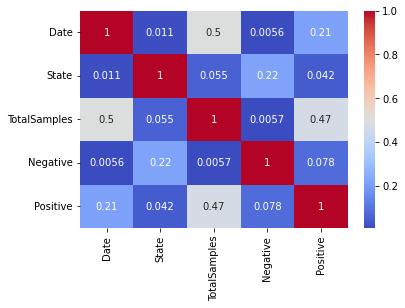

In [10]:
import seaborn as sb
plot=sb.heatmap(df.corr(),annot=True,cmap="coolwarm")

<AxesSubplot:>

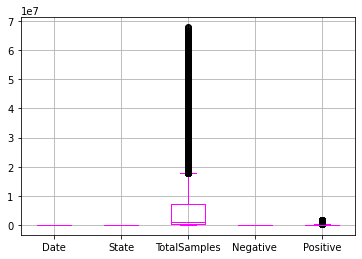

In [11]:
df.boxplot(color="magenta")

In [12]:
df=df[df["TotalSamples"]<2*1000000]

In [13]:
X=df[["TotalSamples","Negative","State"]]
Y=df["Positive"]

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=101)
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.metrics import mean_absolute_error
tr=dtc()
tr.fit(X_train,Y_train)
ans=tr.predict(X_test)
error=mean_absolute_error(ans,Y_test)

In [16]:
mean=df["Positive"].mean()

In [17]:
error/mean

0.04998315674716339